In [27]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA


# FAZER ANÁLISE BIVARIADA

In [28]:
# Load data 
base_folder = Path.cwd()
clean_folder = base_folder.parent / 'data/clean_data'
df_train = pd.read_csv(f'{clean_folder}/df_train0.csv')
df_test = pd.read_csv(f'{clean_folder}/df_test0.csv')

In [29]:
# Label encoding
columns_to_encode = ['ESTADO','REGIAO', 'PORTE', 'SEGMENTO_INDUSTRIAL']
label_encoders = {}

for column in columns_to_encode:
    le = LabelEncoder()
    df_train[column] = le.fit_transform(df_train[column])
    df_test[column] = le.fit_transform(df_test[column])
    label_encoders[column] = le

# Confirming that the columns are encoded
df_train[columns_to_encode].head(), df_test[columns_to_encode].head()

(   ESTADO  REGIAO  PORTE  SEGMENTO_INDUSTRIAL
 0      23       3      1                    2
 1      23       3      1                    2
 2      23       3      1                    2
 3      23       3      1                    2
 4      23       3      1                    2,
    ESTADO  REGIAO  PORTE  SEGMENTO_INDUSTRIAL
 0      20       4      1                    2
 1      20       4      1                    2
 2      20       4      1                    2
 3      20       4      1                    2
 4      23       3      2                    2)

In [30]:
# Extract available date columns
available_date_columns = ['DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO']

# Convert date columns to datetime and extract year and month
for date_col in available_date_columns:
    df_train[date_col] = pd.to_datetime(df_train[date_col], errors='coerce')
    df_train[f'{date_col}_year'] = df_train[date_col].dt.year
    df_train[f'{date_col}_month'] = df_train[date_col].dt.month
    if date_col != 'DATA_PAGAMENTO':
        df_test[date_col] = pd.to_datetime(df_test[date_col], errors='coerce')
        df_test[f'{date_col}_year'] = df_test[date_col].dt.year
        df_test[f'{date_col}_month'] = df_test[date_col].dt.month


In [31]:
df_train = df_train.drop(columns=['DIAS_ATRASO', 'VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO']).copy()
df_test = df_test.drop(columns=['VALOR_A_PAGAR', 'RENDA_MES_ANTERIOR', '_merge', 'DATA_EMISSAO_DOCUMENTO', 'DATA_VENCIMENTO']).copy()

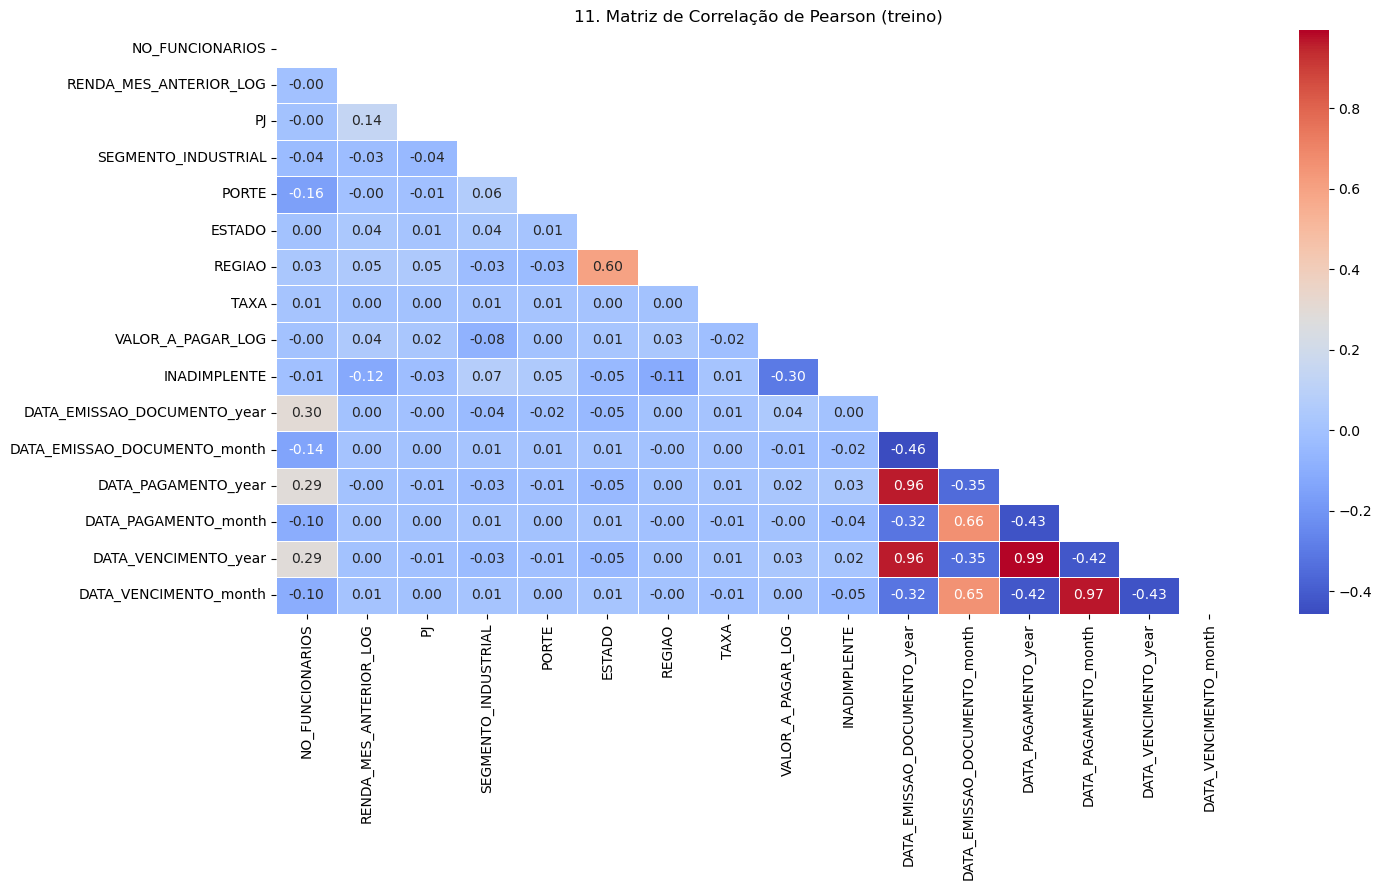

In [32]:
plt.figure(figsize=(15, 9))
corr_table = df_train.drop(columns=['ID_CLIENTE', 'SAFRA_REF']).corr()
mask = np.triu(np.ones_like(corr_table, dtype=bool))
sns.heatmap(corr_table, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('11. Matriz de Correlação de Pearson (treino)')
plt.tight_layout()
plt.show()

In [33]:
df_train.columns

Index(['ID_CLIENTE', 'SAFRA_REF', 'NO_FUNCIONARIOS', 'RENDA_MES_ANTERIOR_LOG',
       'PJ', 'SEGMENTO_INDUSTRIAL', 'PORTE', 'ESTADO', 'REGIAO', 'TAXA',
       'VALOR_A_PAGAR_LOG', 'INADIMPLENTE', 'DATA_EMISSAO_DOCUMENTO_year',
       'DATA_EMISSAO_DOCUMENTO_month', 'DATA_PAGAMENTO_year',
       'DATA_PAGAMENTO_month', 'DATA_VENCIMENTO_year',
       'DATA_VENCIMENTO_month'],
      dtype='object')

In [34]:
# Define the previously selected top features (based on earlier PCA analysis)
# top_features = ['ESTADO', 'REGIAO', 'VALOR_A_PAGAR_LOG', 'RENDA_MES_ANTERIOR_LOG', 'SEGMENTO_INDUSTRIAL']
# top_features = ['ESTADO', 'REGIAO', 'VALOR_A_PAGAR_LOG', 'RENDA_MES_ANTERIOR_LOG', 'SEGMENTO_INDUSTRIAL', 'PORTE']

X = df_train.drop(columns=['ID_CLIENTE', 'SAFRA_REF', 'INADIMPLENTE', 'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO'])
y = df_train['INADIMPLENTE']

# Standardize the numerical features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Apply PCA to see the importance of all features, including the year and month features
pca = PCA()
X_pca = pca.fit_transform(X)

# Calculate and display the importance of each feature based on PCA loadings
# loadings = pd.DataFrame(pca.components_.T, index=X.columns, columns=['PCA1', 'PCA2'])
# loadings['Importance'] = loadings[['PCA1', 'PCA2']].abs().sum(axis=1)

# Sort and display the importance
# sorted_features_with_year_month = loadings['Importance'].sort_values(ascending=False)
print("Most important features based on PCA loadings (including year and month components):")
# print(sorted_features_with_year_month)

KeyError: "['DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO'] not found in axis"

In [23]:
X_pca

array([[-1.68889050e-01,  8.99491027e+00,  3.85093013e+00, ...,
         1.09451583e-02,  2.72152707e-03,  8.37397621e-03],
       [-1.68885806e-01,  8.99325126e+00,  3.85173140e+00, ...,
         1.03455098e-02,  3.07979858e-03,  3.44531608e-03],
       [-1.68885719e-01,  8.99320688e+00,  3.85175284e+00, ...,
         1.03294687e-02,  3.08938269e-03,  3.31346972e-03],
       ...,
       [ 8.11763035e+00, -2.20495898e+00,  5.36333170e-01, ...,
         9.68777403e-03,  1.04756930e-02,  5.82143130e-03],
       [ 1.26771139e-01,  8.83243871e+00, -1.74918591e-01, ...,
         6.31416946e-03,  3.38771854e-03,  1.31890857e-02],
       [-1.91202081e+00, -5.06409671e+00,  1.35305868e+00, ...,
         6.29600511e-02,  6.89082037e-03,  5.91648130e-02]])

In [24]:
X.columns

Index(['NO_FUNCIONARIOS', 'RENDA_MES_ANTERIOR_LOG', 'PJ',
       'SEGMENTO_INDUSTRIAL', 'PORTE', 'ESTADO', 'REGIAO', 'TAXA',
       'VALOR_A_PAGAR_LOG', 'DATA_EMISSAO_DOCUMENTO_year',
       'DATA_EMISSAO_DOCUMENTO_month', 'DATA_PAGAMENTO_year',
       'DATA_PAGAMENTO_month', 'DATA_VENCIMENTO_year',
       'DATA_VENCIMENTO_month'],
      dtype='object')

In [22]:
pca.explained_variance_ratio_

array([7.57953008e-01, 1.27237931e-01, 7.74394657e-02, 1.33877023e-02,
       7.96712481e-03, 4.56215511e-03, 3.14070065e-03, 2.41712061e-03,
       1.85742451e-03, 1.79492546e-03, 1.27473659e-03, 9.51034021e-04,
       7.98474955e-06, 4.80907947e-06, 3.87803698e-06])

In [25]:
df_train.columns

Index(['ID_CLIENTE', 'SAFRA_REF', 'NO_FUNCIONARIOS', 'RENDA_MES_ANTERIOR_LOG',
       'PJ', 'SEGMENTO_INDUSTRIAL', 'PORTE', 'ESTADO', 'REGIAO',
       'DATA_EMISSAO_DOCUMENTO', 'DATA_PAGAMENTO', 'DATA_VENCIMENTO', 'TAXA',
       'VALOR_A_PAGAR_LOG', 'INADIMPLENTE', 'DATA_EMISSAO_DOCUMENTO_year',
       'DATA_EMISSAO_DOCUMENTO_month', 'DATA_PAGAMENTO_year',
       'DATA_PAGAMENTO_month', 'DATA_VENCIMENTO_year',
       'DATA_VENCIMENTO_month'],
      dtype='object')

In [35]:
print(f'{clean_folder}')

# Save the cleaned dataframe
df_train.to_csv(clean_folder / 'df_train_selected.csv', index=False)
df_test.to_csv(clean_folder / 'df_test_selected.csv', index=False)

/Users/mariananeves/Documents/projects/mariana_neves_cientista_dados_jr_DATARISK/data/clean_data


In [48]:
df_train.head()

,ID_CLIENTE,SAFRA_REF,NO_FUNCIONARIOS,RENDA_MES_ANTERIOR_LOG,PJ,SEGMENTO_INDUSTRIAL,PORTE,REGIAO,DATA_EMISSAO_DOCUMENTO,DATA_PAGAMENTO,DATA_VENCIMENTO,TAXA,VALOR_A_PAGAR_LOG,INADIMPLENTE,DATA_EMISSAO_DOCUMENTO_year,DATA_EMISSAO_DOCUMENTO_month,DATA_PAGAMENTO_year,DATA_PAGAMENTO_month,DATA_VENCIMENTO_year,DATA_VENCIMENTO_month
0,1.661240e+18,2018-08,118.0,12.390355,1.0,2,1,3,2018-08-17,2018-09-06,2018-09-06,6.99,10.477778,0.0,2018,8,2018,9,2018,9
1,1.661240e+18,2018-08,118.0,12.390355,1.0,2,1,3,2018-08-19,2018-09-11,2018-09-10,6.99,9.784660,0.0,2018,8,2018,9,2018,9
2,1.661240e+18,2018-08,118.0,12.390355,1.0,2,1,3,2018-08-26,2018-09-18,2018-09-17,6.99,9.766118,0.0,2018,8,2018,9,2018,9
3,1.661240e+18,2018-08,118.0,12.390355,1.0,2,1,3,2018-08-30,2018-10-11,2018-10-05,6.99,7.201916,1.0,2018,8,2018,10,2018,10
4,1.661240e+18,2018-08,118.0,12.390355,1.0,2,1,3,2018-08-31,2018-09-20,2018-09-20,6.99,9.966972,0.0,2018,8,2018,9,2018,9
